In [40]:
import sklearn.datasets
import matplotlib.pyplot as plt
import warnings

In [3]:
wine = sklearn.datasets.load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
x = wine.data
y = wine.target

In [ ]:
'''
i = 9   # to plot the 9th feature
plt.hist(x[(y==0),i], alpha=0.5, color='green', label='class_0')
plt.hist(x[(y==1),i], alpha=0.5, color='blue', label='class_1')
plt.hist(x[(y==2),i], alpha=0.5, color='red', label='class_2')
plt.show()
'''


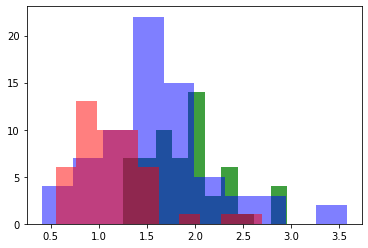

In [23]:
plt.hist(x[(y==0)]['proanthocyanins'],alpha=0.5, color='green', label='class_0')
plt.hist(x[(y==0)]['proanthocyanins'], alpha=0.5, color='green', label='class_0')
plt.hist(x[(y==1)]['proanthocyanins'], alpha=0.5, color='blue', label='class_1')
plt.hist(x[(y==2)]['proanthocyanins'], alpha=0.5, color='red', label='class_2')
plt.show()

In [24]:
x.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

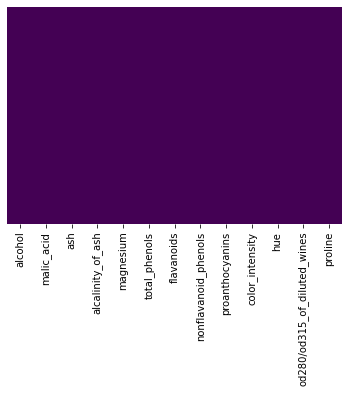

In [26]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import numpy as np
warnings.filterwarnings("ignore")
scaler = StandardScaler()
x_std = scaler.fit_transform(np.array(x['proanthocyanins']).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x_std,y, test_size=0.3, random_state=10)

In [56]:
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [57]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [58]:
print(train_accuracy)

0.5806451612903226


In [59]:
print(test_accuracy)

0.5370370370370371


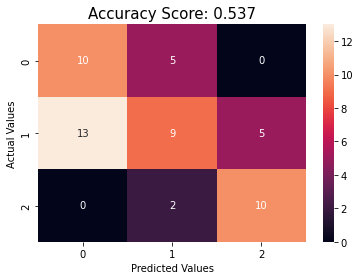

In [60]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [62]:
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [63]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [64]:
print(train_accuracy)

0.9758064516129032


In [65]:
print(test_accuracy)

0.8148148148148148


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [78]:
def evaluate_model(models):
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        
        result.append(cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        #"CrossValerrors": cv_std,
        "Models": "KNeighborsClassifier"
            
    })
    return result_df

In [79]:
random_state = 10
models = [KNeighborsClassifier()]
evaluate_model(models)

,CrossValMeans,Models
0,0.754487,KNeighborsClassifier
